# <font color='blue'>Chapter 12. FIR Filter</font>

## <font color='blue'>Problem</font>

### Notch Filter Explained
https://www.youtube.com/watch?v=7wPYPI3E3eE
    
### Digital Filters Part 1
https://www.youtube.com/watch?v=loHy8v9A8LY&t=467s
    
### FIR and IIR filters
https://www.youtube.com/watch?v=9yNQBWKRSs4

### <font color='green'>Next: IIR Filter</font>

## <font color='blue'>Introduction to FIR (Finite Impusle Response)</font>

If a moving average filter $y[n]=T{x[n]}$ is given as follows.

\begin{equation}
x=\{1,2,4,3,2,1,1 \}, n=0,1,...,6 \\
y[n]=\frac{1}{3}(x[n]+x[n+1]+x[n+2])   
\end{equation} 

<div>
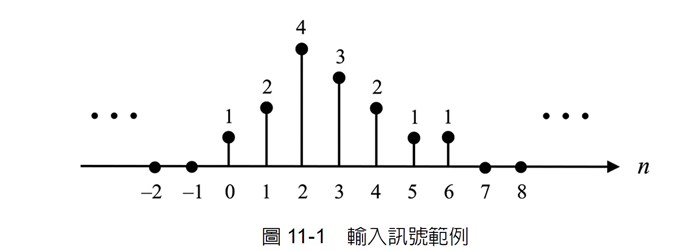
</div>

Then, the output signals are <br>
\begin{equation}
\begin{split}
y[0] &= \frac{1}{3}(x[0]+x[1]+x[2]) = \frac{1}{3} (1+2+4) = \frac{7}{3}  \\
y[1] &= \frac{1}{3}(x[1]+x[2]+x[3]) = \frac{1}{3} (2+4+3) = 3  \\
...
\end{split}
\end{equation} 

<div>
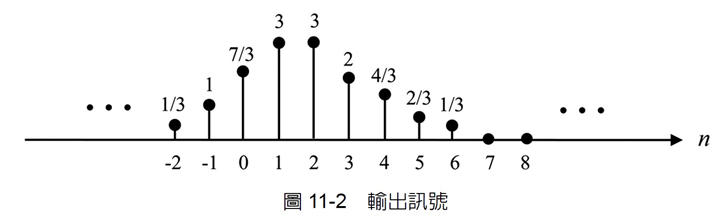
</div>

In constrast, if a moving average filter $y[n]=T{x[n]}$ is given as follows.

\begin{equation}
y[n]=\frac{1}{3}(x[n]+x[n-1]+x[n-2])   
\end{equation} 

<div>
<img src="attachment:image-2.png" width="500"/>
</div>

## <font color='blue'>FIR (Finite Impusle Response)</font>

If an input signal $x[n]$ and an output signal $y[n]$, and an finite impulse response (FIR) can be defined as follows.
\begin{equation}
y[n]= \sum_{k=0}^{M} b_k x[n-k]   
\end{equation} 
where $b_k, k=0,1,...,M$ is named coefficients of FIR and $M$ is the order of the filter

If the input signal is an unit impulse $\delta[n]$, such that we have <br>
\begin{equation}
x[n] = \delta[n]
\end{equation}
Then, subtitute the impulse into FIR
\begin{equation}
y[n]= \sum_{k=0}^{M} b_k \cdot x[n-k] = \sum_{k=0}^{M} b_k \cdot \delta[n-k]
\end{equation}
That is the coefficients of FIR are the impulse response of an unit impulse 
\begin{equation}
y[n]= b_0 \delta[n] + b_1 \delta[n-1]+...+b_M \delta[n-M]
\end{equation}

<div>
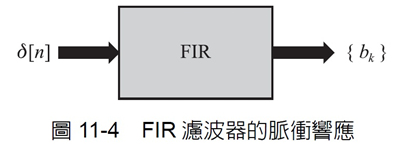
</div>

When applying Z transform, then
\begin{equation}
\begin{split}
Y(z) &= Z\{ y[n] \} = Z\{ \sum_{k=0}^{M} b_k \cdot x[n-k] \} \\
     &= Z\{ b_0 x[n] + b_1 x[n-1] +...+ b_M x[n-M]\} \\
     &= Z\{ b_0 x[n] \} + Z\{ b_1 x[n-1] \} +...+ Z\{ b_M x[n-M]\} \\
     &= b_0 \cdot Z\{x[n]\} +  b_1 \cdot Z\{x[n-1]\} +...+ b_M \cdot Z\{ x[n-M]\} \\
     &= b_0 X(z) + b_1 z^{-1}X(z) +...+ b_M z^{-M}X(z) \\
     &= (b_0 + b_1 z^{-1} +...+ b_M z^{-M})X(z)\\
     &= H(z)X(z)
\end{split}
\end{equation} 

If we have the following basic elements such as adder, multiplier, and unit delay.

<div>
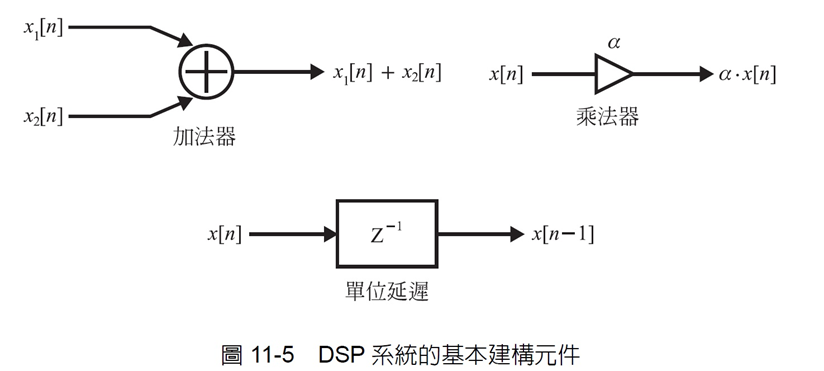
</div>

Then, the system blocks of the FIR can be 

<div>
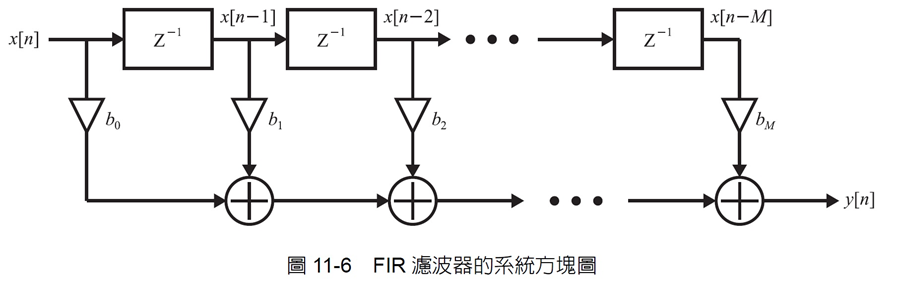
</div>

### <font color='blue'> FIR Example 1. (Moving Average) </font>
Asssume the coefficients of an FIR are 
\begin{equation}
\{b_k\}=\{ \frac{1}{3}, \frac{1}{3}, \frac{1}{3} \}, k=0,1,2
\end{equation}

In [1]:
import numpy as np
import scipy.signal as signal

x = np.array( [ 1, 2, 4, 3, 2, 1, 1 ] )
b = np.ones( 3 ) / 3
y = signal.lfilter( b, 1, x ) # a = 1 -> FIR filter 

print( "x =", x )
print( "y =", y )

x = [1 2 4 3 2 1 1]
y = [0.33333333 1.         2.33333333 3.         3.         2.
 1.33333333]


### <font color='blue'> FIR Example 2. (Stock Analysis) </font>

<div>
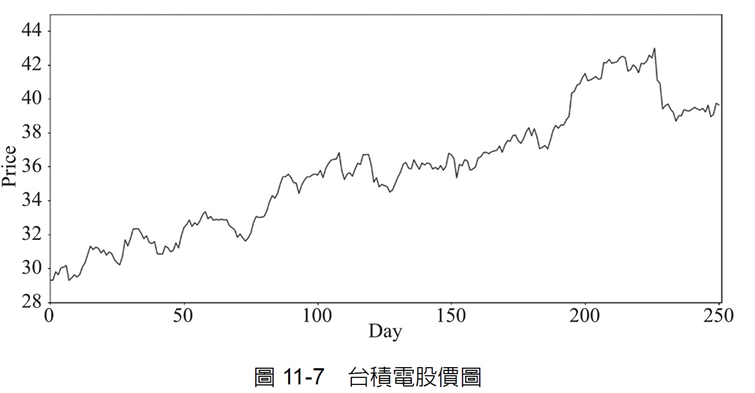
</div>

<div>
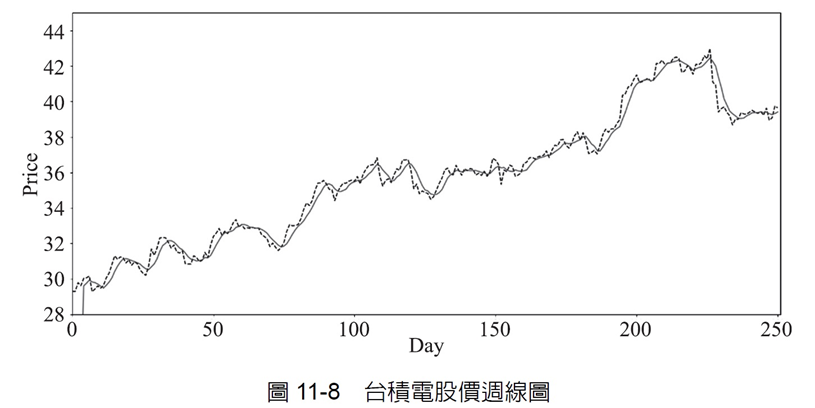
</div>

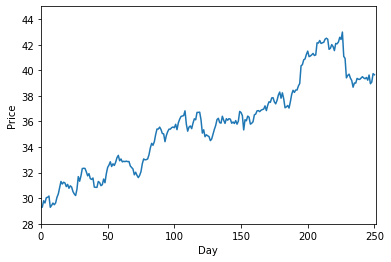

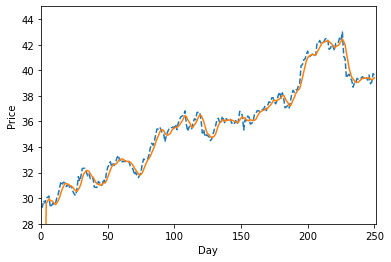

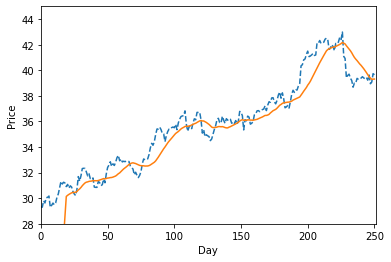

In [2]:
import numpy as np
import csv
import scipy.signal as signal
import matplotlib.pyplot as plt

csvDataFile = open( 'TSM2017.csv' )
reader = csv.reader( csvDataFile )

data = []							# data set for stock
for row in reader:				
	data.append( row[4] )	

price = []							# read price
for i in range( 1, len( data ) ):	
	price.append( eval( data[i] ) )

day = np.arange( len( price ) )
x = np.array( price )				# transfer to array

b1 = np.ones( 5 ) / 5				# weekly
y1 = signal.lfilter ( b1, 1, x )

b2 = np.ones( 20 ) / 20				# monthly
y2 = signal.lfilter ( b2, 1, x )

plt.figure( 1 )					
plt.plot( day, x, '-', fillstyle = 'bottom' )						
plt.xlabel( 'Day' )
plt.ylabel( 'Price' )
plt.axis( [ 0, len( price), 28, 45 ] )
		
plt.figure( 2 )					
plt.plot( day, x, '--', day, y1, '-' )	
plt.xlabel( 'Day' )
plt.ylabel( 'Price' )
plt.axis( [ 0, len( price), 28, 45 ] )

plt.figure( 3 )						
plt.plot( day, x, '--', day, y2, '-' )		
plt.xlabel( 'Day' )
plt.ylabel( 'Price' )
plt.axis( [ 0, len( price), 28, 45 ] )

plt.show()

### <font color='blue'> FIR Example 3. (Nulling Filter aka Notch Filter) </font>
It is used to filter a specific frquency.

If the disturbance is defined as <br>
\begin{equation}
\hat{x}(t)=\cos (\hat{\omega}t)
\end{equation}

where $\hat{\omega}$ and $\hat{\omega} = 2 \pi \hat{f}$ is the angular frequency of the disturbance

\begin{equation}
\hat{x}[n]=\cos (2 \pi \hat{f} n/f_s) 
\end{equation}

According to anti-Eular formula,
\begin{equation}
\cos (2 \pi \hat{f} n/f_s) = \frac{1}{2} (e^{j2\pi\hat{f} n/f_s}+e^{-j2\pi\hat{f} n/f_s})
\end{equation}

Hence, we need design a two-order FIR to eliminate the two complex-signal by two zeros as follows.

\begin{equation}
z_1 = e^{j2\pi\hat{f} n/f_s} \\
z_2 = e^{-j2\pi\hat{f} n/f_s}
\end{equation}
by two filters $H_1(z)=1-z_1z^{-1}$ and  $H_2(z)=1-z_2z^{-1}$ <br>
such that the final FIR is

\begin{equation}
\begin{split}
H(z) &= H_1(z) \cdot H_2(z) = (1-z_1z^{-1})(1-z_2z^{-1}) \\
     &= 1-(z_1 + z_2)z^{-1} +(z_1z_2)z^{-2} \\
     &= 1-(e^{j2\pi\hat{f} n/f_s} + e^{-j2\pi\hat{f} n/f_s})z^{-1} +(e^{j2\pi\hat{f} n/f_s} e^{-j2\pi\hat{f} n/f_s})z^{-2} \\
     &= 1- 2 \cos (2 \pi \hat{f} n/f_s) z^{-1} + z^{-2} 
\end{split}
\end{equation} 

### <font color='blue'> FIR Example 4. </font>
If the original signal is $\cos (2\pi \cdot (10) \cdot t) $, while with extra signal $\cos (2\pi \cdot (20) \cdot t) $ <br>
such that the received input signal is defined as 
\begin{equation}
x(t)=\cos (2\pi \cdot (10) \cdot t) + \cos (2\pi \cdot (20) \cdot t)
\end{equation}
Please design a FIR to restore the origins in sampling fequency 100 Hz.

Sol. <br>
Because the frquencies of the disturbance signal and sampling are 20 Hz and 100 Hz.<br>
Hence, we have <br>
\begin{equation}
H(z)=1- 2 \cos ( \frac{2 \pi \cdot (20) n}{100}) z^{-1} + z^{-2}
\end{equation}

<div>
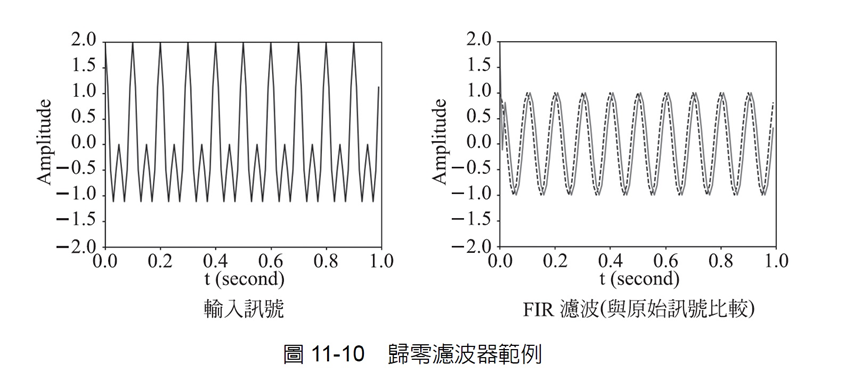
</div>

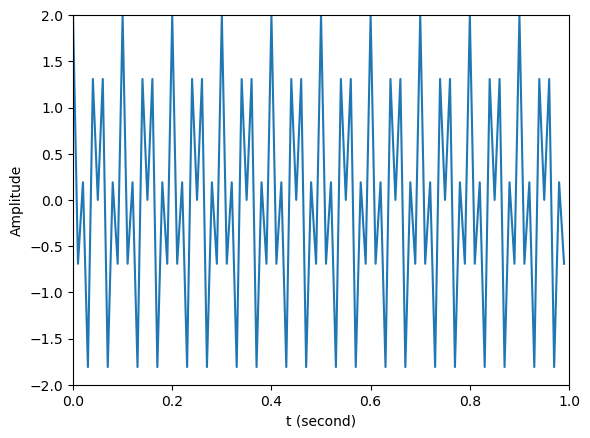

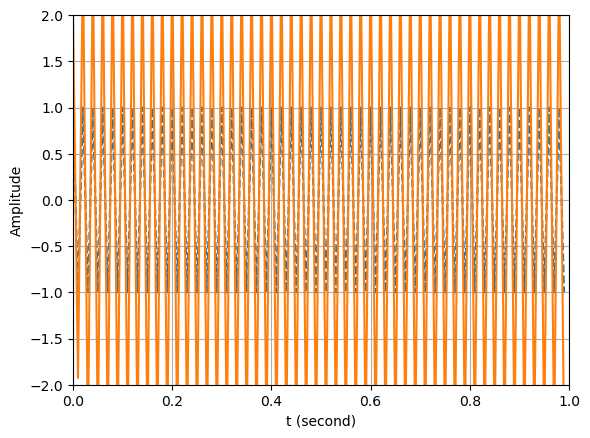

In [5]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

fs = 100
fd = 20
t = np.linspace( 0, 1, fs, endpoint = False )	# define time 
xo = np.cos( 2 * np.pi * 50 * t )				# original
xd = np.cos( 2 * np.pi * fd * t )				# disturbance
x = xo + 1 * xd

b = np.array( [ 1, -2 * np.cos( 2 * np.pi * (fd) / fs ), 1 ] )	
y = signal.lfilter( b, 1, x )					# FIR

plt.figure( 1 )									# 
plt.plot( t, x )
plt.xlabel( 't (second)' )
plt.ylabel( 'Amplitude' )
plt.axis( [ 0, 1, -2, 2 ] )

plt.figure( 2 )									
plt.plot( t, xo, '--', t, y, '-' )
plt.xlabel( 't (second)' )
plt.ylabel( 'Amplitude' )
plt.axis( [ 0, 1, -2, 2 ] )
plt.grid()
plt.show( )

## <font color='red'> Final Problem:</font>
### 60 Hz Notch Filter with Op Amp
https://www.youtube.com/watch?v=e67OmQbR3TI
    
### Signal Processing - 20 (How to) Create A Digital Filter in Python
https://www.youtube.com/watch?v=wJgBB4EsUHw

In [14]:
import matplotlib.pyplot as plt #For plotting
from math import sin, pi #For generating input signals
import sys #For reading command line arguments

### Filter - 6KHz->8Khz Bandpass Filter
### @param [in] input - input unfiltered signal
### @param [out] output - output filtered signal
def filter(x):
    y = [0]*48000
    for n in range(4, len(x)):
        y[n] = 0.0101*x[n] - 0.0202*x[n-2] + 0.0101*x[n-4] + 2.4354*y[n-1] - 3.1869*y[n-2] + 2.0889*y[n-3] - 0.7368*y[n-4] 
    return y

###Read in desired frequency from command line
frequency = 700 # int(sys.argv[1])

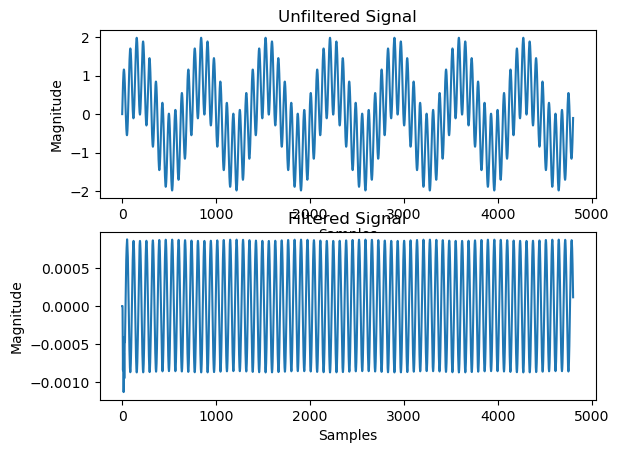

In [19]:
### Create empty arrays
input = [0]*48000
output = [0]*48000

### Fill array with xxxHz signal
for i in range(48000):
    input[i] = sin(2 * pi * frequency * i / 48000) + sin(2 * pi * 70 * i / 48000)

### Run the signal through the filter
output = filter(input)

### Grab samples from input and output #1/100th of a second
output_section = output[0:4800]  
input_section = input[0:4800] 

### Plot the signals for comparison
plt.figure(1)                
plt.subplot(211)   
plt.ylabel('Magnitude')
plt.xlabel('Samples') 
plt.title('Unfiltered Signal')      
plt.plot(input_section)
plt.subplot(212)             
plt.ylabel('Magnitude')
plt.xlabel('Samples') 
plt.title('Filtered Signal')
plt.plot(output_section)
plt.show()